In [1]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
from vega_datasets import data
df = data.sf_temps()
df

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00
...,...,...
8754,50.40,2010-12-31 19:00:00
8755,49.90,2010-12-31 20:00:00
8756,49.40,2010-12-31 21:00:00
8757,48.80,2010-12-31 22:00:00


In [3]:
t = pd.Timestamp('2021-06-30, 07:50:15')
t

Timestamp('2021-06-30 07:50:15')

In [4]:
t.weekday()
t.day_name()

'Wednesday'

### 1.  Resample by the day and take the average temperature. Visualize the average temperature over time.

In [5]:
df = df.set_index('date').sort_index()
df

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00
...,...
2010-12-31 19:00:00,50.40
2010-12-31 20:00:00,49.90
2010-12-31 21:00:00,49.40


In [6]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


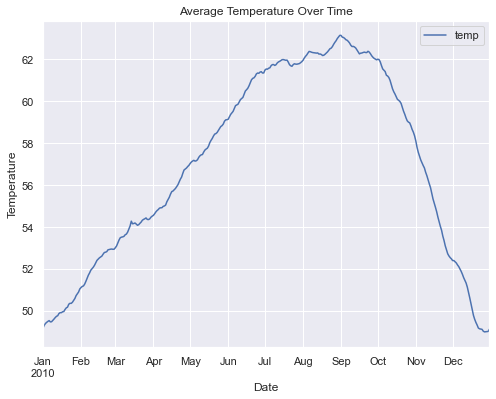

In [7]:
df.resample('D').mean().plot()
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.

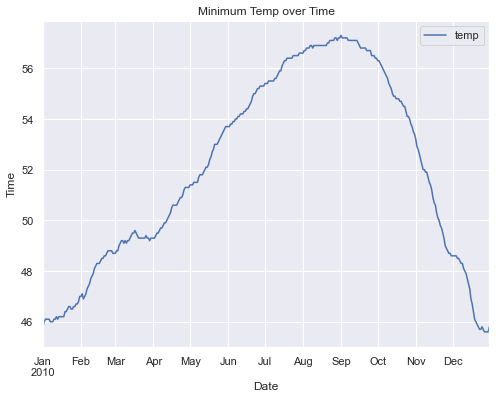

In [8]:
df.resample('D').min().plot()
plt.title('Minimum Temp over Time')
plt.xlabel('Date')
plt.ylabel('Time')
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.

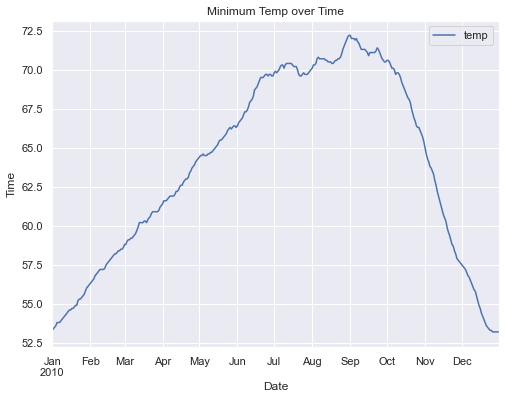

In [9]:
df.resample('D').max().plot()
plt.title('Minimum Temp over Time')
plt.xlabel('Date')
plt.ylabel('Time')
plt.show()

### 4. Which month is the coldest, on average?

In [10]:
df.resample('M').mean().sort_values('temp').head(1)

,temp
date,
2010-01-31,49.98


### 5. Which month has the highest average temperature?

In [11]:
df.resample('M').mean().sort_values('temp').tail(1)

,temp
date,
2010-09-30,62.49


### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [12]:
sf_df = df.resample('D').agg(['min', 'max'])

In [13]:
sf_df

temp      
             min   max
date                  
2010-01-01 45.80 53.30
2010-01-02 46.00 53.40
2010-01-03 46.10 53.50
2010-01-04 46.10 53.60
2010-01-05 46.10 53.80
...          ...   ...
2010-12-27 45.60 53.20
2010-12-28 45.60 53.20
2010-12-29 45.60 53.20
2010-12-30 45.60 53.20
2010-12-31 45.80 53.20

[365 rows x 2 columns]

In [14]:
sf_df['diff'] = sf_df.temp['max'] - sf_df.temp['min']

In [15]:
sf_df

temp       diff
             min   max     
date                       
2010-01-01 45.80 53.30 7.50
2010-01-02 46.00 53.40 7.40
2010-01-03 46.10 53.50 7.40
2010-01-04 46.10 53.60 7.50
2010-01-05 46.10 53.80 7.70
...          ...   ...  ...
2010-12-27 45.60 53.20 7.60
2010-12-28 45.60 53.20 7.60
2010-12-29 45.60 53.20 7.60
2010-12-30 45.60 53.20 7.60
2010-12-31 45.80 53.20 7.40

[365 rows x 3 columns]

In [16]:
sf_df.resample('M').mean().sort_values(by='diff').tail(1)

temp        diff
             min   max      
date                        
2010-09-30 56.90 71.31 14.40

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<function matplotlib.pyplot.show(close=None, block=None)>

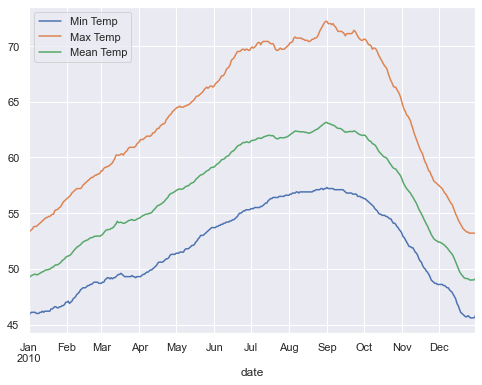

In [19]:
#sf_df.plot(label = 'raw data')
df.resample('D').min().temp.plot(label = 'Min Temp')
df.resample('D').max().temp.plot(label = 'Max Temp')
df.resample('D').mean().temp.plot(label = 'Mean Temp')
plt.legend()
plt.show